In [1]:
%pylab inline
import matplotlib.pylab as plt
import math
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Линейная классификация

Ранее мы изучили задачу восстановления регрессии и способы её решения. В частности, для линейной модели с функционалом качества MSE решение данной задачи выписывается аналитически через матрицу "объект-признак" и вектор ответов обучающей выборки.

Процесс обучения линейного классификатора складывается из следующих шагов:

* Получение обучающей выборки $X = \{ \left( x_i, y_i \right) \}_{i=1}^l$
* Выбор верхней оценки для пороговой функции потерь — отсюда получаем общий вид оптимизируемого функционала $\widetilde{Q}(w, X^l)$
* Проводим оптимизацию при помощи некоторого метода оптимизации и получаем оптимальное значение $w^*$
* Предсказываем ответы для новых объектов по формуле $a(x) = \langle w^*, x\rangle$

### Логистическая регрессия

Рассмотрим в качестве верхней оценки пороговой функции потерь логистическую функцию:

$$\widetilde{L}(M) = \log_2(1 + \exp(-M)).$$

Таким образом, необходимо решить следующую оптимизационную задачу:
$$\frac{1}{l} \sum_{i=1}^l \widetilde{L} (M_i) = \frac{1}{l} \sum_{i=1}^l \log_2 (1 + \exp (-y_i \langle w, x_i \rangle)) \to \min_w$$

Получившийся метод обучения называется **логистической регрессией**.

Одно из полезных свойств логистической регрессии, которое будет изучено нами несколько позднее, — тот факт, что она позволяет предсказывать помимо метки класса ещё и вероятность принадлежности каждому из них, что может быть полезным в некоторых задачах.

**Пример**: Вы работаете в банке и хотите выдавать кредиты только тем клиентам, которые вернут его с вероятностью не меньше 0.9.

### Пример обучения логистической регрессии
#### Определение спама по тексту электронного письма

Попробуем при помощи моделей линейной классификации построить алгоритм, отделяющий спам от нормальной почты. Для экспериментов воспользуемся небольшим набором данных с [UCI](https://archive.ics.uci.edu/ml/datasets.html). Объекты в датасете соответствуют письмам, которые описаны признаками на основе текста письма, спам — положительный пример для классификации, хорошее письмо — отрицательный пример.

In [2]:
colums = []
with open("spambase.names", "r") as doc:
    lines = doc.readlines()
    for line in lines[33:]:
        colums.append(line.split(":")[0])
print(colums)

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

In [3]:
spam_data = pd.read_csv("spambase.data", names=colums+['class'])
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
X, y = spam_data.iloc[:, :-1].values, spam_data.iloc[:, -1].values

### Обучение логистической регрессии

Разделим выборку на обучающую и тестовую в отношении 80/20 и обучим логистическую регрессию при помощи объекта [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [5]:
from sklearn.linear_model import LogisticRegression

# splitting data
train_part = 0.8
n_train = int(train_part * X.shape[0])
X_tr = X[:n_train]
X_test = X[n_train:]
y_tr = y[:n_train]
y_test = y[n_train:]

# training
lr = LogisticRegression()
lr = lr.fit(X_tr, y_tr)

Оценим долю верных прогнозов полученной модели (accuracy) при помощи соответствующей функции из модуля [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

In [6]:
from sklearn import metrics

preds = lr.predict(X_test)

print('Accuracy =', metrics.accuracy_score(y_test, preds))

Accuracy = 0.7893593919652552


Сгенерируем двумерную искуственную выборку из 2 различных нормальных распределений:

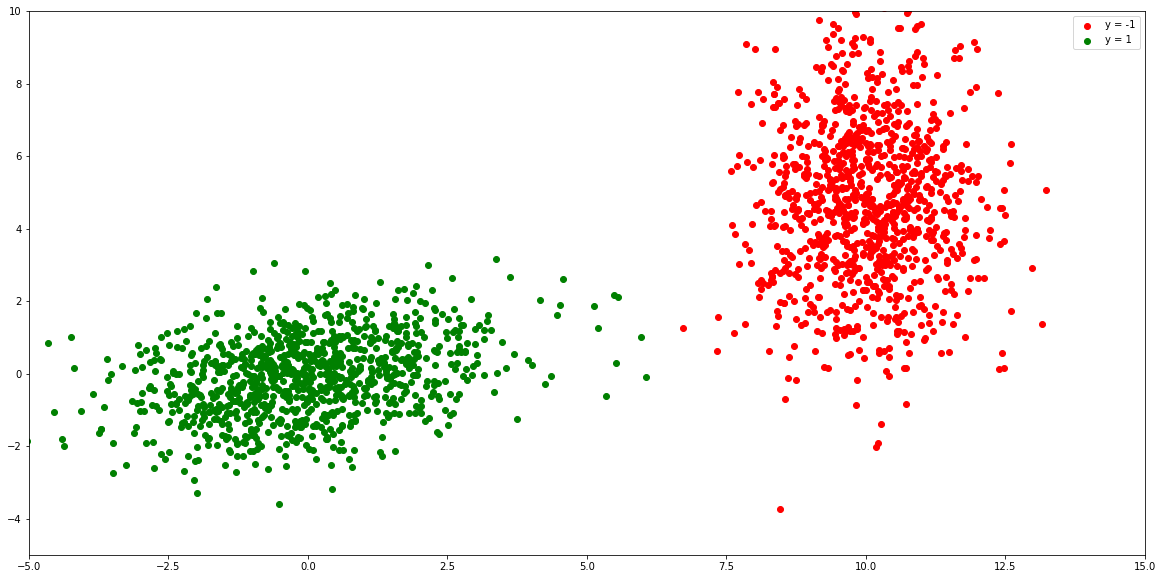

In [10]:
plt.figure(figsize=(20,10))
mean0 = [10, 5]
cov0 = [[1, 0], [0, 5]]  # diagonal covariance
data0 = np.random.multivariate_normal(mean0, cov0, 1000)
mean1 = [0, 0]
cov1 = [[3, 1], [0, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, 1000)
data = np.vstack((data0, data1))
y_vis = np.hstack((-np.ones(1000), np.ones(1000)))


plt.scatter(data0[:, 0], data0[:, 1], c='red')
plt.scatter(data1[:, 0], data1[:, 1], c='green')
plt.legend(['y = -1', 'y = 1'])
axes = plt.gca()
axes.set_xlim([-5,15])
axes.set_ylim([-5,10])
plt.show()

Обучим логистическую регрессию:

In [11]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    data, y_vis, test_size=0.2)

from sklearn import linear_model

logreg = linear_model.LogisticRegression(penalty='l2')
logreg.fit(X_train_vis, y_train_vis)

LogisticRegression()

Полученные в результате оптимизации коэффициенты линейной модели содержатся в атрибутах coef\_ и intercept\_ соответствующего объекта. Визуализируем разделяющую гиперплоскость алгоритма и рассмотрим значения предсказанных моделью вероятностей принадлежности нового объекта каждому из классов в зависимости от его координат.

In [12]:
print(logreg.coef_, logreg.intercept_)

[[-2.23918382 -0.39486116]] [14.52919277]


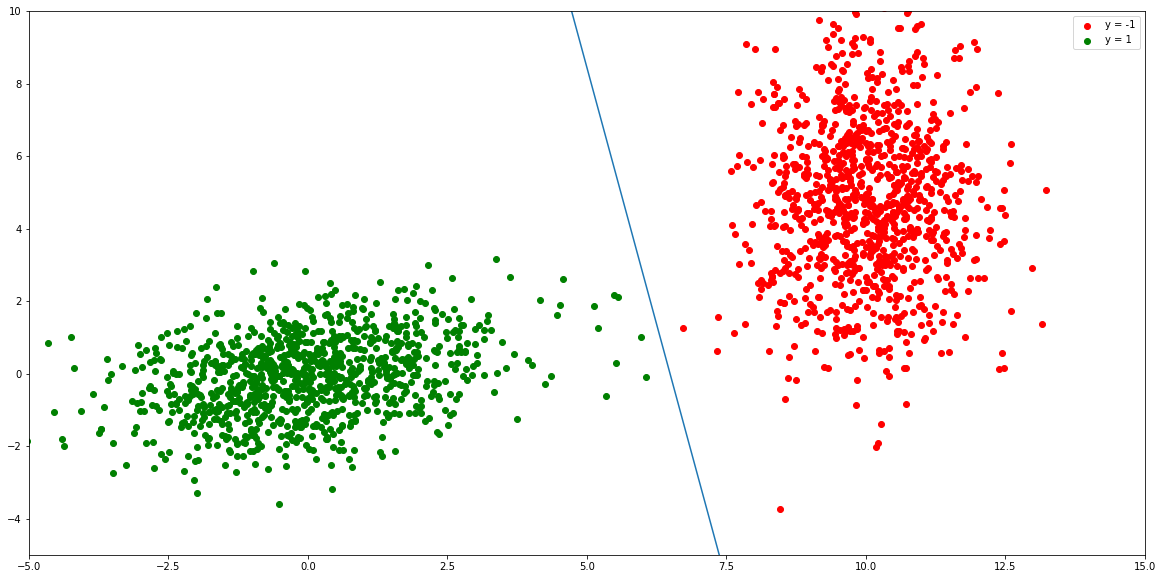

In [15]:
w_1 = logreg.coef_[0][0]
w_2 = logreg.coef_[0][1]
w_0 = logreg.intercept_[0]


plt.figure(figsize=(20,10))
plt.scatter(data0[:, 0], data0[:, 1], c='red')
plt.scatter(data1[:, 0], data1[:, 1], c='green')
plt.legend(['y = -1', 'y = 1'])
x_arr = np.linspace(-10, 15, 3000)
plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
axes = plt.gca()
axes.set_xlim([-5,15])
axes.set_ylim([-5,10])
plt.show()

P(y = -1|x) = 0.9998253178443453
P(y = 1|x) = 0.00017468215565471197


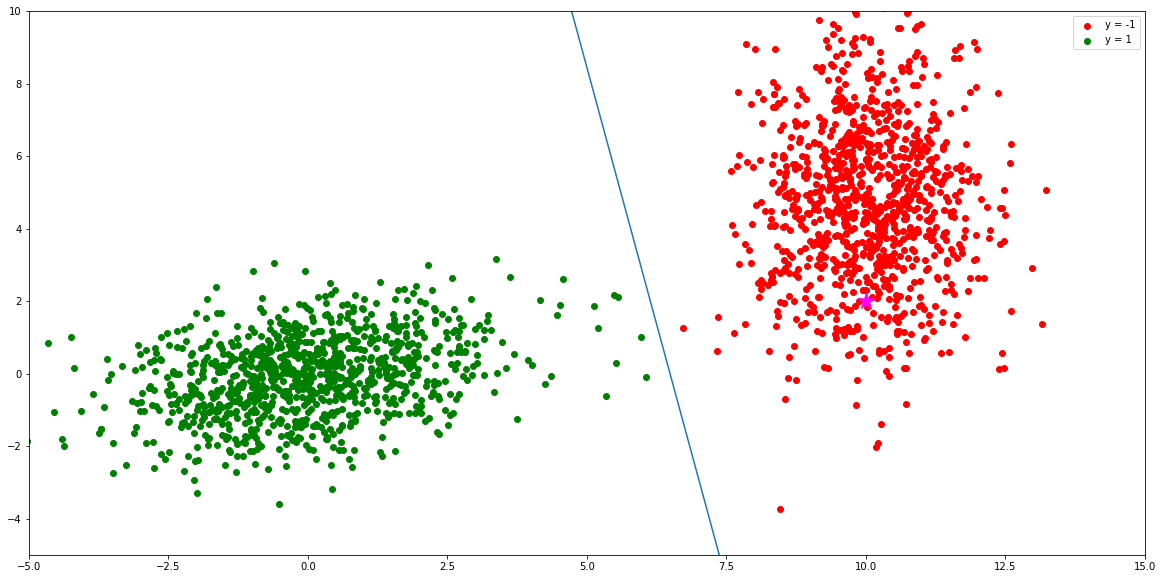

In [16]:
point = np.array([[10, 2]]) # изменяем только координаты объекта

plt.figure(figsize=(20,10))
plt.scatter(data0[:, 0], data0[:, 1], c='red')
plt.scatter(data1[:, 0], data1[:, 1], c='green')
plt.scatter(point[:, 0], point[:, 1], marker = '*', s = 300, color = 'magenta')
plt.legend(['y = -1', 'y = 1'])
x_arr = np.linspace(-10, 15, 3000)
plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
axes = plt.gca()
axes.set_xlim([-5,15])
axes.set_ylim([-5,10])
prob = logreg.predict_proba(point)
print('P(y = -1|x) =', prob[0][0])
print('P(y = 1|x) =', prob[0][1])
plt.show()

In [17]:
logreg.predict_proba(point)

array([[9.99825318e-01, 1.74682156e-04]])

In [18]:
logreg.predict_proba(data)

array([[9.99831660e-01, 1.68339901e-04],
       [9.99955800e-01, 4.42001419e-05],
       [9.99984355e-01, 1.56452647e-05],
       ...,
       [5.19555684e-06, 9.99994804e-01],
       [3.91994331e-03, 9.96080057e-01],
       [5.50967716e-10, 9.99999999e-01]])

In [19]:
data

array([[ 9.85302542,  2.92714198],
       [10.6730963 ,  1.66363928],
       [10.68026702,  4.25323741],
       ...,
       [ 1.19948542, -0.82149668],
       [ 3.95048213,  0.36870337],
       [-2.64086553, -2.22044833]])

### SGDClassifier

Объект [SGDClissifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) позволяет обучать линейные модели классификации и регрессии с помощью стохастического градиентного спуска.

Полезные параметры:
* loss - функция потерь (по факту то, какую модель обучаем): **hinge** (SVM), **log** (логистическая регрессия), **perceptron** (персептрон) и другие;
* penalty - тип регуляризации: **l1**, **l2**, **elasticnet** (смесь l1 и l2 регуляризации);
* alpha - коэффициент регуляризации;
* fit_intercept - необходимо ли добавлять в модель свободный член (True/False);
* n_iter - число эпох (полных проходов по выборке) при обучении;
* learning_rate - шаг градиентного спуска (оптимизируется по умолчанию).

In [20]:
from sklearn.linear_model import SGDClassifier
lr_sgd = SGDClassifier(loss="log", alpha=0.05, max_iter=200, fit_intercept=True)
lr_sgd.fit(X_tr, y_tr)
preds_sgd = lr_sgd.predict(X_test)
print('Accuracy =', metrics.accuracy_score(y_test, preds_sgd))

Accuracy = 0.749185667752443


In [22]:
lr_sgd = SGDClassifier(loss="hinge")
lr_sgd.fit(X_tr, y_tr)
preds_sgd = lr_sgd.predict(X_test)
print('Accuracy =', metrics.accuracy_score(y_test, preds_sgd))

Accuracy = 0.7947882736156352


## Оценка качества работы классификатора
### Бинарные метрики
Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (`train`) и контроль (`test`). Выбор пропорции разбиения — компромисс: большой размер обучения ведет к более богатым информацией и качественным алгоритмам, большой размер контрольной выборки ведет к менее шумной оценке качества.

Для оценки качества классификации рассматривают [матрицу ошибок](http://en.wikipedia.org/wiki/Confusion_matrix): строчки соответствуют прогнозу модели, столбцы — истинным ответам, ячейки содержат число примеров тестовой выборки. Если для некоторого алгоритма $a(\cdot)$ и объекта $x$ выполняется $a(x) = 1$, то говорят, что алгоритм $a$ _выделяет_ объект $x$.

| | y = +1 | y = -1 |
|------|------|
|   **a(x) = +1**  | TP| FP |
| **a(x) = -1**| FN | TN |

Диагональ матрицы ошибок содержит правильно классифицированные положительные (TP) и отрицательные (TN) примеры. False Positive (FP) — ошибки I рода (ложное срабатывание, положили в спам хорошее письмо), False Negative (FN) — ошибки II рода (не отфильтровали спам). Ошибки I и II рода могут иметь различную стоимость.

Часто рассматриваются следующие метрики качества бинарной классификации:
  - Доля правильных ответов (Accuracy):
  $$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
  - Точность/precision (доля действительно положительных объектов среди объектов, выделенных алгоритмом):
  $$precision = \frac{TP}{TP + FP}$$
  - Полнота/recall (доля выделенных алгоритмом объектов среди всех положительных объектов выборки):
  $$recall = \frac{TP}{TP + FN}$$
  - $F_1$-мера (среднее гармоническое между точностью и полнотой)
  $$F_1 = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$$
  
Подробнее про метрики качества бинарной классификации на Википедии: [Precision and Recall](http://en.wikipedia.org/wiki/Precision_and_recall).

### Выбор порога классификации
Многие модели классификации получают оценку принадлежности положительному классу $b(x) \in \mathbb{R}$, после чего принимается решение о классификации объекта путем сравнения оценки с некоторым порогом:

$a(x) = \begin{cases}
        +1, \, b(x) \ge t,\\
        -1, \, b(x) < t.
        \end{cases}$
        
Матрица ошибок и все производные от нее метрики (Accuracy, Precision, Recall, etc.) зависят от порога $t$:
![Порог классификации](./images/binary_threshold.png) 

Поскольку иногда необходимо оценить качество модели $b(x),$ предсказывающей не конкретную метку класса, а степень принадлежности классу (т.е. вне зависимости от значения порога), рассматривают координатную плоскость, по осям которой отложены значения метрик, а качество работы классификатора представлено в виде кривой — траектории изменения соответствующих метрик при варьировании порога:
![Принцип построения ROC-кривой](./images/roc_trajectory.png)

Наиболее распространены ROC-кривые и Precision/Recall кривые.
 - По осям Ox и Oy ROC-кривой отложены соответственно False Positive Rate (FPR) и True Positive Rate (TPR):
 $$FPR = \frac{FP}{FP + TN},$$
 $$TPR = \frac{TP}{FN + TP}.$$
 - По осям Ox и Oy PR-кривой отложены соответственно Recall и Precision.


Аббревиатура ROC ([Receiver Operating Characteristic](en.wikipedia.org/wiki/Receiver_operating_characteristic)) была унаследована из инженерного дела.

![Примеры ROC-кривых](./images/roc_and_pr_curves.png)

В случае, если необходимо сравнить качество классификаторов вне зависимости от порога, применяют интегральные числовые метрики, например AUC-ROC (**A**rea **U**nder RO**C**) — площадь под ROC-кривой классификатора. AUC-ROC идеально работающего классификатора равно 1. Идеальный случайный классификатор в среднем имеет AUC-ROC=0.5.

Построим описанные кривые для логистической регрессии, обученной на описанном выше датасете.

* PR-кривая проходит через точку (0,0).

* Если при каком-то значении порога $t$ алгоритм $a(x)$ идеально разделяет объекты 2 классов, то PR-кривая проходит через точку (1,1).


In [23]:
X_train_curve, X_test_curve, y_train_curve, y_test_curve = train_test_split(X, y, test_size=0.2)

lr = LogisticRegression()
lr = lr.fit(X_train_curve, y_train_curve)

In [25]:
from sklearn.metrics import precision_recall_curve

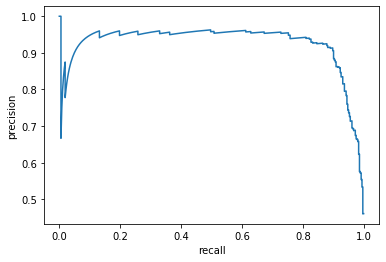

In [15]:
precision, recall, thresholds = precision_recall_curve(y_test_curve, lr.predict_proba(X_test_curve)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [16]:
from sklearn.metrics import auc

auc(recall, precision)

0.924272277954764

* ROC проходит через точки (0,0) и (1,1)
* Если при каком-то значении порога $t$ алгоритм $a(x)$ идеально разделяет объекты 2 классов, то ROC проходит через точку (0,1).


In [17]:
from sklearn.metrics import roc_curve

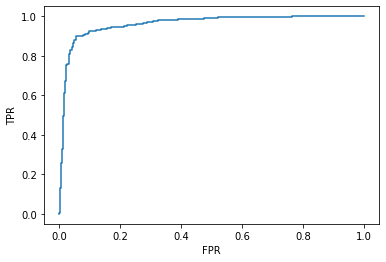

In [18]:
fpr, tpr, thresholds = roc_curve(y_test_curve, lr.predict_proba(X_test_curve)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [19]:
auc(fpr, tpr)

0.9611192218912147

## Валидация
Чтобы оценить качество работы алгоритма, необходимо провести валидацию. Это один из самых важных шагов в процессе решения задачи. Оценим accuracy для модели логистической регрессии в задаче про спам-письма на тестовой выборке. 

In [28]:
spam_data = pd.read_csv("spambase.data", names=colums+['class'])
 
X, y = spam_data.iloc[:, :-1].values, spam_data.iloc[:, -1].values

# обучающая выборка
X_tr = X[:n_train]
y_tr = y[:n_train]

# валидационная выборка
X_test = X[n_train:]
y_test = y[n_train:]

# обучим ещё раз логистическую регрессию
lr = LogisticRegression()
lr = lr.fit(X_tr, y_tr)

#посмотрим на точность классификации

preds = lr.predict(X_test)
print('Accuracy =', metrics.accuracy_score(y_test, preds))

Accuracy = 0.7893593919652552


А теперь попробуем перемешать объекты и повторим действия:

In [29]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=train_part, random_state=123, shuffle=True)

# обучим ещё раз логистическую регрессию
lr = LogisticRegression()
lr = lr.fit(X_tr, y_tr)

#посмотрим на точность классификации

preds = lr.predict(X_test)
print('Accuracy =', metrics.accuracy_score(y_test, preds))

Accuracy = 0.9127954360228199


Как мы видим, качество классификации новых данных резко возросло. С чем это может быть связано? Рассмотрим вектор целевой переменной:

Text(0, 0.5, 'Target')

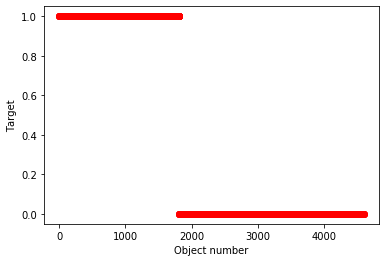

In [30]:
plt.plot(y, 'ro')
plt.xlabel('Object number')
plt.ylabel('Target')

Проблема заключалась в том, что в выборке примеры были упорядочены: сначала шли примеры положительного класса, а потом отрицательного. Поэтому нельзя забывать **перемешивать классы**.

Чтобы повысить устойчивость оценки качества, можно проводить разбиение выборки на обучающую и тестовую не один, $N$ раз, после чего усреднять результаты, полученные на $N$ контрольных выборках. Для этого можно использовать функцию [`sklearn.model_selection.ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)

In [31]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.1, random_state=123)
ss.get_n_splits(X)
quals = []
lr = LogisticRegression()
for tr_ind, test_ind in ss.split(X):
    lr.fit(X[tr_ind, :], y[tr_ind])
    quals.append(
        metrics.roc_auc_score(y[test_ind],
                              lr.predict_proba(X[test_ind, :])[:, 1]))

In [32]:
print('Mean AUC-ROC =', np.mean(quals))
print('AUC-ROC standart deviation =', np.std(quals))

Mean AUC-ROC = 0.962166187397069
AUC-ROC standart deviation = 0.005462059900884362


Увеличим $N$:

In [33]:
ss = ShuffleSplit(n_splits=10, test_size=0.1, random_state=123)
ss.get_n_splits(X)
quals = []
lr = LogisticRegression()
for tr_ind, test_ind in ss.split(X):
    lr.fit(X[tr_ind, :], y[tr_ind])
    quals.append(
        metrics.roc_auc_score(y[test_ind],
                              lr.predict_proba(X[test_ind, :])[:, 1]))

In [34]:
print('Mean AUC-ROC =', np.mean(quals))
print('AUC-ROC standart deviation =', np.std(quals))

Mean AUC-ROC = 0.9631172870718103
AUC-ROC standart deviation = 0.007592196986571446


In [36]:
ss = ShuffleSplit(n_splits=10, test_size=0.1, random_state=123)
ss

ShuffleSplit(n_splits=10, random_state=123, test_size=0.1, train_size=None)

In [37]:
ss.get_n_splits(X)

10

In [38]:
ss.split(X)

<generator object BaseShuffleSplit.split at 0x15a3a72b0>

### Несбалансированные классы

Если объём выборки невелик, а объектов одного класса значительно меньше, чем другого, то может сложиться ситуация, когда при случайном разбиении объектов меньшего класса не окажется в тестовой выборке, в связи с чем результаты оценки качества будут неустойчивы.

**Пример**: задача кредитного скоринга. Поскольку случаи невозврата кредита довольно редки, количество объектов отрицательного класса будет значительно меньше, чем положительного.

In [39]:
df = pd.read_csv('data/givemesomecredit')
X = df.drop('SeriousDlqin2yrs', axis=1)
X = X.fillna(X.mean()).as_matrix()
y = df['SeriousDlqin2yrs']
print("Доля заемщиков, не вернувших кредит:", y.mean())

Доля заемщиков, не вернувших кредит: 0.007126060001425212


In [41]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.957151,40,0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
1,0,0.658180,38,1,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
2,0,0.233810,30,0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
3,0,0.907239,49,1,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0
4,0,0.213179,74,0,0.375607,3500.0,3.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
14028,1,0.751281,38,3,0.701100,3000.0,7.0,1.0,1.0,1.0,2.0
14029,1,0.952629,65,1,1.086779,2200.0,4.0,0.0,1.0,1.0,1.0
14030,1,0.246941,50,0,0.059129,15000.0,11.0,0.0,0.0,1.0,0.0
14031,1,0.003952,87,0,269.000000,NaN,7.0,0.0,1.0,0.0,NaN


- Всего 0.7% выборки составляют объекты положительного класса

- В таком случае необходимо производить стратификацию, то есть разбивать отдельно объекты каждого класса на обучение и тест (сохраняя их доли).

Оценим влияние стратификации на оценку качества путем разбиения выборки $N=10$ раз на обучение и тест и последующего усреднения AUC-ROC на тестовой выборке:

In [42]:
ss = ShuffleSplit(n_splits=10, test_size=0.2, random_state=123)
ss.get_n_splits(X)
quals = []

lr = LogisticRegression()
for tr_ind, test_ind in ss.split(X):
    lr.fit(X[tr_ind, :], y[tr_ind])
    quals.append(metrics.roc_auc_score(y[test_ind], lr.predict_proba(X[test_ind,:])[:,1]))

print("AUC-ROC w/o stratification = ", np.mean(quals))
print("AUC-ROC std w/o stratification = ", np.std(quals))

AUC-ROC w/o stratification =  0.6391042552352417
AUC-ROC std w/o stratification =  0.04487853093191112


In [43]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=124)
sss.get_n_splits(X, y)
quals = []
lr = LogisticRegression()
for tr_ind, test_ind in sss.split(X, y):
    lr.fit(X[tr_ind, :], y[tr_ind])
    quals.append(metrics.roc_auc_score(y[test_ind], lr.predict_proba(X[test_ind,:])[:,1]))

print("AUC-ROC with stratification = ", np.mean(quals))
print("AUC-ROC std with stratification = ", np.std(quals))

AUC-ROC with stratification =  0.6206817366343739
AUC-ROC std with stratification =  0.06328570053780545


Как мы видим, стратификация позволяет уменьшить дисперсию и более точно оценить качество

#### Кросс-валидация
Рассмотрим датасет о пациентах, больных бесплодием, содержащий около 100 объектов. Выборка небольшая, но из специфичной области, поэтому каждый объект может нести в себе важную информацию, влияющую на значение целевой переменной. В связи с этим при оценивании качества модели хотелось бы сделать обучающую выборку как можно больше. При этом из-за маленького объема всей выборки мы можем позволить себе обучать модель многократно. В данной ситуации для оценки качества можно использовать схему leave-one-out, реализованную в качестве объекта [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

Оценка качества производится следующим образом: каждый объект поочередно исключается из обучающей выборки, после чего модель обучается на всех остальных объектах, а качество измеряется на исключенном объекте (этот объект играет роль тестовой выборки); после того, как каждый объект был выкинут ровно по одному разу, итоговая оценка качества получается как среднее по всем полученным значениям функционала:

$$Q_{LOO}(X) = \frac{1}{l} \sum_{i=1}^l Q(\{x_i \}; a_{X \backslash \{x_i\} }),$$
где
* $X = \left\{ (x_i, y_i)\right\}_{i=1}^l$ — обучающая выборка;
* $Q(X^{test}; a)$ — значение функционала алгоритма $a$ на контрольной выборке $X^{test}$;
* $a_{X^{train}}(\cdot)$ — алгоритм, обученный на обучающей выборке $X^{train}.$

In [44]:
from sklearn.model_selection import LeaveOneOut

df = pd.read_csv('data/fertility', header=None)
X = df.ix[:, :8]
y = np.zeros(df.shape[0])
y[df[9].as_matrix() == 'N'] = 1

loo = LeaveOneOut()
loo.get_n_splits(X)
qual = []
for tr_ids, test_ids in loo.split(X):
    lr.fit(X.ix[tr_ids, :], y[tr_ids])
    qual.append(lr.predict(X.ix[test_ids, :]) == y[test_ids])

print("LOO accuracy =", np.mean(qual))

LOO accuracy = 0.88


In [45]:
df

,0,1,2,3,4,5,6,7,8,9
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


С ростом размера выборки возрастают также и затраты на многократное обучение модели. Тем не менее, хотелось бы, чтобы каждый объект побывал и в обучающей, и в тестовой выборках, причём одинаковое количество раз. Чтобы удовлетворить этому условию, можно использовать схему K-fold кросс-валидации, реализованную в качестве объекта [`sklearn.cross_validation.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

![](http://scott.fortmann-roe.com/docs/docs/MeasuringError/crossvalidation.png)

В данном случае выборка разбивается на $K$ (примерно) одинаковых блоков, каждый из которых поочередно выступает в качестве контрольной выборки, а оставшиеся $K-1$ — в качестве обучающей, после чего оценки качества усредняются:

$$Q_{K-fold}(X) = \frac{1}{K} \sum_{k=1}^K Q(X^k; a_{X \backslash X^k }),$$
где $X^k, k = \overline{1, K}$ — непересекающиеся блоки, на которые разбивается выборка $X$: $X = \sqcup_{k=1}^K X^k.$


In [31]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=2, random_state=123, shuffle=True)
kf.get_n_splits(X)

lr = LogisticRegression()
quals = []
for tr_ids, test_ids in kf.split(X):
    lr.fit(X.ix[tr_ids,:], y[tr_ids])
    quals.append(metrics.accuracy_score(y[test_ids], lr.predict(X.ix[test_ids, :])))

print("K-fold accuracy =", np.mean(quals))

K-fold accuracy = 0.88
